# Tech - carte

Faire une carte, c'est toujours compliqué. C'est simple jusqu'à ce qu'on s'aperçoive qu'on doit récupérer la description des zones administratives d'un pays, fournies parfois dans des coordonnées autres que longitude et latitude. Quelques modules utiles :

* [cartopy](https://scitools.org.uk/cartopy/docs/latest/) : surcouche de matplotlib pour faire des dessins avec des coordonnées géographiques
* [bokeh](https://docs.bokeh.org/) : pour tracer des cartes interactives
* [pyproj](https://github.com/pyproj4/pyproj) : conversion entre systèmes de coordonnées
* [shapely](https://shapely.readthedocs.io/en/stable/manual.html) : manipuler des polygones géographiques (union, intersection, ...)
* [pyshp](https://github.com/GeospatialPython/pyshp) : lire ou écrire des polygones géographiques
* [geopandas](https://geopandas.org/) : manipulation de dataframe avec des coordonnées géographiques

Quelques notebooks intéressants :
* [Tracer une carte en Python avec bokeh](http://195-154-200-30.rev.poneytelecom.eu/app/papierstat/helpsphinx/notebooks/enedis_cartes_bokeh.html)
* [Tracer une carte en Python](http://195-154-200-30.rev.poneytelecom.eu/app/papierstat/helpsphinx/notebooks/enedis_cartes.html)
* [Données carroyées et OpenStreetMap](http://195-154-200-30.rev.poneytelecom.eu/app/papierstat/helpsphinx/notebooks/carte_carreau.html)
* [Carte de France avec les départements](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td1a_cenonce_session_12_carte.html)
* [Carte de France avec les départements (2)](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/notebooks/seance6_graphes_correction.html)

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Exposé

On télécharge des [données hospitalières par départements](https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/).

### Données COVID

In [3]:
# https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/
from pandas import read_csv
url = "https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7"
covid = read_csv(url, sep=";")
covid.tail()

,dep,sexe,jour,hosp,rea,rad,dc
73927,974,1,2020-11-16,47,8,277,18
73928,974,2,2020-11-16,41,9,282,21
73929,976,0,2020-11-16,13,4,500,32
73930,976,1,2020-11-16,8,3,240,20
73931,976,2,2020-11-16,5,1,255,12


In [4]:
last_day = covid.loc[covid.index[-1], "jour"]
last_day

'2020-11-16'

In [5]:
last_data = covid[covid.jour == last_day].groupby("dep").sum()
last_data.shape

(101, 5)

In [6]:
last_data.describe()

,sexe,hosp,rea,rad,dc
count,101.0,101.000000,101.000000,101.000000,101.000000
mean,3.0,659.455446,96.732673,2783.039604,618.366337
std,0.0,706.432113,122.227402,3666.557494,806.620353
min,3.0,26.000000,0.000000,182.000000,24.000000
25%,3.0,216.000000,26.000000,647.000000,142.000000
50%,3.0,420.000000,50.000000,1356.000000,306.000000
75%,3.0,837.000000,130.000000,3355.000000,676.000000
max,3.0,3798.000000,620.000000,18651.000000,4637.000000


### Données départements

On récupère ensuite la définition [géographique des départements](https://www.data.gouv.fr/en/datasets/contours-geographiques-des-departements/).

In [7]:
import geopandas
# dernier lien de la page (format shapefiles)
url = "https://www.data.gouv.fr/en/datasets/r/ed02b655-4307-4db4-b1ca-7939145dc20f"
geo = geopandas.read_file(url)
geo.tail()

,code_depart,departement,code_region,region,code_ancien,ancienne_re,geometry
96,87,Haute-Vienne,75.0,Nouvelle-Aquitaine,74.0,Limousin,"POLYGON ((0.92278 45.94610, 0.92856 45.94808, ..."
97,63,Puy-de-Dôme,84.0,Auvergne-Rhône-Alpes,83.0,Auvergne,"POLYGON ((2.45492 45.76131, 2.45169 45.76137, ..."
98,14,Calvados,28.0,Normandie,25.0,Basse-Normandie,"MULTIPOLYGON (((-0.42990 48.86405, -0.42881 48..."
99,07,Ardèche,84.0,Auvergne-Rhône-Alpes,82.0,Rhône-Alpes,"POLYGON ((4.30746 44.98596, 4.30412 44.98837, ..."
100,32,Gers,76.0,Occitanie,73.0,Midi-Pyrénées,"POLYGON ((-0.24307 43.66404, -0.24328 43.66476..."


Il faudrait aussi fusionner avec la population de chaque département. Ce sera pour une autre fois. 

### Carte

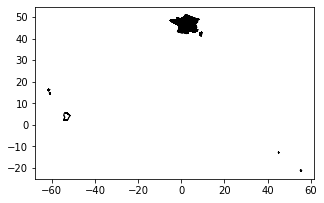

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
geo.plot(ax=ax, color='white', edgecolor='black');

On enlève tous les départements à trois chiffres.

In [9]:
codes = [_ for _ in set(geo.code_depart) if len(_) < 3]
metropole = geo[geo.code_depart.isin(codes)]
metropole.tail()

,code_depart,departement,code_region,region,code_ancien,ancienne_re,geometry
96,87,Haute-Vienne,75.0,Nouvelle-Aquitaine,74.0,Limousin,"POLYGON ((0.92278 45.94610, 0.92856 45.94808, ..."
97,63,Puy-de-Dôme,84.0,Auvergne-Rhône-Alpes,83.0,Auvergne,"POLYGON ((2.45492 45.76131, 2.45169 45.76137, ..."
98,14,Calvados,28.0,Normandie,25.0,Basse-Normandie,"MULTIPOLYGON (((-0.42990 48.86405, -0.42881 48..."
99,07,Ardèche,84.0,Auvergne-Rhône-Alpes,82.0,Rhône-Alpes,"POLYGON ((4.30746 44.98596, 4.30412 44.98837, ..."
100,32,Gers,76.0,Occitanie,73.0,Midi-Pyrénées,"POLYGON ((-0.24307 43.66404, -0.24328 43.66476..."


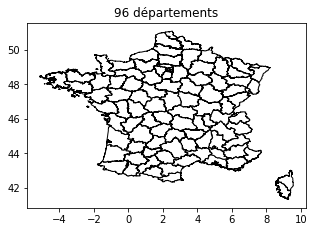

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
metropole.plot(ax=ax, color='white', edgecolor='black')
ax.set_title("%s départements" % metropole.shape[0]);

### Carte COVID

In [11]:
merged = last_data.reset_index(drop=False).merge(metropole, left_on="dep", right_on="code_depart")
merged.shape

(96, 13)

In [12]:
merged.tail()

,dep,sexe,hosp,rea,rad,dc,code_depart,departement,code_region,region,code_ancien,ancienne_re,geometry
91,91,3,1422,227,8167,1651,91,Essonne,11.0,Île-de-France,11.0,Île-de-France,"POLYGON ((2.04261 48.62638, 2.04045 48.62754, ..."
92,92,3,1750,312,14079,2752,92,Hauts-de-Seine,11.0,Île-de-France,11.0,Île-de-France,"POLYGON ((2.22040 48.92061, 2.23114 48.92773, ..."
93,93,3,1717,230,12493,2593,93,Seine-Saint-Denis,11.0,Île-de-France,11.0,Île-de-France,"POLYGON ((2.45949 48.95505, 2.46072 48.95840, ..."
94,94,3,1866,265,13021,3100,94,Val-de-Marne,11.0,Île-de-France,11.0,Île-de-France,"POLYGON ((2.32906 48.81378, 2.33190 48.81701, ..."
95,95,3,1045,118,8304,1966,95,Val-d'Oise,11.0,Île-de-France,11.0,Île-de-France,"POLYGON ((2.43548 49.13411, 2.44084 49.13419, ..."


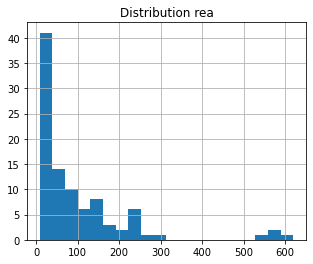

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
merged.hist('rea', bins=20, ax=ax)
ax.set_title("Distribution rea");

Les régions les plus peuplées ont sans doute la plus grande capacité hospitalière. Il faudrait diviser par cette capacité pour avoir une carte qui ait un peu plus de sens. Comme l'idée est ici de simplement tracer la carte, on ne calculera pas de ratio.

In [14]:
merged.sort_values('rea').tail()

,dep,sexe,hosp,rea,rad,dc,code_depart,departement,code_region,region,code_ancien,ancienne_re,geometry
92,92,3,1750,312,14079,2752,92,Hauts-de-Seine,11.0,Île-de-France,11.0,Île-de-France,"POLYGON ((2.22040 48.92061, 2.23114 48.92773, ..."
59,59,3,3314,555,11109,2660,59,Nord,32.0,Hauts-de-France,31.0,Nord-Pas-de-Calais,"MULTIPOLYGON (((3.04058 50.15986, 3.04806 50.1..."
69,69,3,3798,581,12454,2488,69,Rhône,84.0,Auvergne-Rhône-Alpes,82.0,Rhône-Alpes,"POLYGON ((4.43893 46.16789, 4.43463 46.17034, ..."
12,13,3,3147,587,16493,2514,13,Bouches-du-Rhône,93.0,Provence-Alpes-Côte d'Azur,93.0,Provence-Alpes-Côte d'Azur,"MULTIPOLYGON (((5.38534 43.18909, 5.38440 43.1..."
75,75,3,2678,620,18651,4637,75,Paris,11.0,Île-de-France,11.0,Île-de-France,"POLYGON ((2.27995 48.87857, 2.28101 48.88297, ..."


In [15]:
geomerged = geopandas.GeoDataFrame(merged)

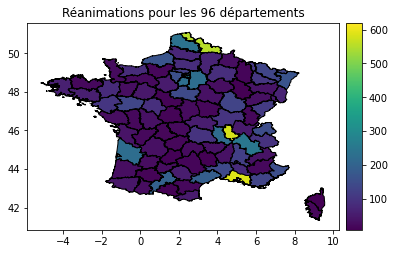

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

# ligne à ajouter pour avoir une légende ajustée à la taille du graphe
cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.1)

geomerged.plot(column="rea", ax=ax, edgecolor='black', legend=True, cax=cax)
ax.set_title("Réanimations pour les %d départements" % metropole.shape[0]);

La création de carte a toujours été plus ou moins compliqué. Les premiers notebooks que j'ai créés sur le sujet étaient beaucoup plus complexe. *geopandas* a simplifié les choses. Son développement a commencé entre [2013](https://github.com/geopandas/geopandas/graphs/contributors) et a bien évolué depuis. Et j'ai dû passer quelques heures à récupérer les contours des départements il y a cinq ans.